In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import os, sys
dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')
print(packagesPath)

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
import lc as LC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/notebooks/paper2/packages


In [2]:
text = """
Brexit: Customs checks to be simplified in no-deal situation.
Lorries will be able to drive straight off ferries and Channel Tunnel trains without making customs declarations in the event of a no-deal Brexit, the government has announced.

New guidance for importers and hauliers says firms would file a simplified form online in advance and pay duty later.

Hauliers have warned that no-deal could result in long queues at Channel ports.

The industry said firms would still not be ready for a "chaotic" EU exit - even with these simplified procedures.

The UK is due to leave the EU at 23:00 GMT on Friday 29 March - with or without a deal.

Theresa May has said she is "determined" to deliver Brexit on time, but a number of cabinet ministers have indicated they would be willing to agree to a short extension to finalise legislation.

Brexit: A really simple guide
What preparations are being made for a no-deal?
Could a no-deal Brexit cause traffic jams?
UK to spend £800k on Eurotunnel Brexit case
Under the HM Revenue & Customs (HMRC) plans, what are being called "transitional simplified procedures" would be introduced for ferry routes from Europe, and for the Channel Tunnel, for at least a year if the UK leaves without a deal.


Media captionUp to 90 lorries assembled at Manston airfield as part of a no-deal Brexit exercise
These would allow an importer to file a very short customs form - a "simplified frontier declaration" - only two hours before a lorry is due to cross the Channel by ferry, or one hour via the Channel Tunnel.

The truck would then be able to drive straight into the UK without any further paperwork being done at the border.

The importer would have to update the computer entry within 24 hours to tell HMRC the goods had arrived, and the duty would be payable as much as a month after the shipment had entered the UK.

The temporary system would be reviewed after three months, but is expected to last more than a year.

The latest guidance applies only to vehicles entering the UK, but additional customs checks may also be introduced for EU-bound lorries arriving at Calais, Coquelles and Dunkirk in the event of no-deal.

Charlie Elphicke, the Conservative MP for Dover - home to the UK's busiest Channel port - described the plans as a "common sense move".

He said he had long argued that "checks can be done away from the border - so traffic can keep flowing smoothly".


However, Rod McKenzie, from the Road Haulage Association, said the guidance would not help trucking firms.

"Business is simply not ready for a chaotic no-deal Brexit," he said.

"The systems aren't in place, the staff are not trained, there isn't the time in the day for hauliers and businesses to do all the paperwork," he told the BBC.

Last month, a convoy of 89 lorries took part in two runs from the disused Manston Airport, near Ramsgate in Kent, on a 20-mile route to the Port of Dover as part of an exercise to test plans for border disruption in the event of a no-deal Brexit.

It emerged on Tuesday that the government plans to pay a law firm £800,000 for advice in case Eurotunnel decides to sue over the effects of Brexit on its business.
"""

# Url: https://www.bbc.co.uk/news/uk-47121225
# Topics: Dover, HM Revenue & Customs, Charlie Elphicke, Brexit


Total vocab:  104
Filtered vocab:  20


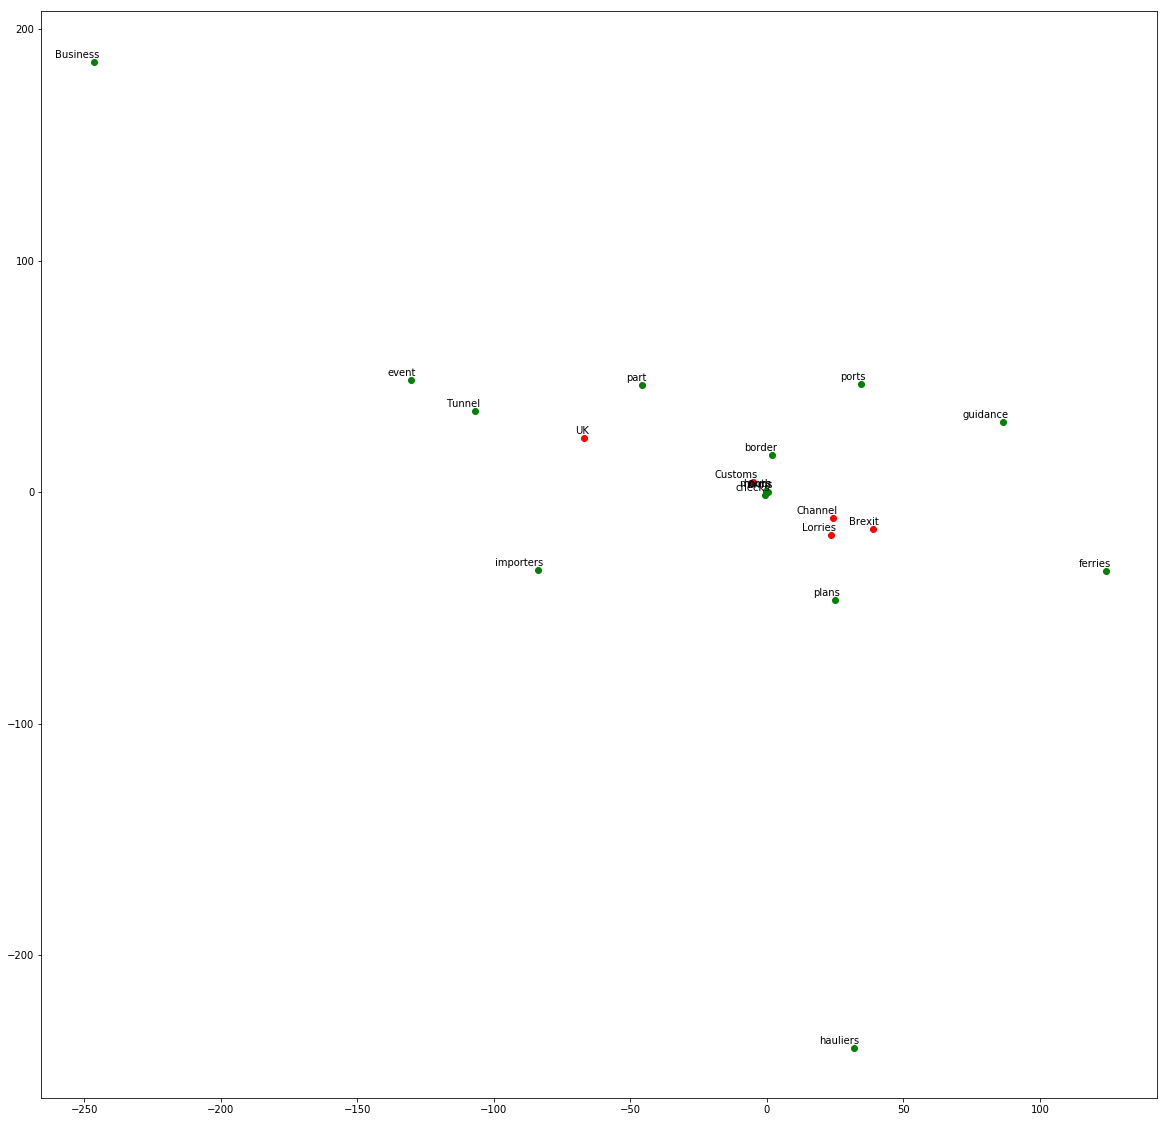

In [3]:
tsneProcessor = LC.TSNELC(text)
tsneProcessor.setAllowedPosTypes(['NN', 'NNP', 'NNS', 'NNPS'])
tsneProcessor.setPerplexity(3)
tsneProcessor.setNumberOfComponents(3)
tsneProcessor.setNumberOfIterations(250)
tsneProcessor.setTopScorePercentage(0.5)
tsneProcessor.setFilterWords(0.2)
tsneProcessor.train()
tsneProcessor.displayPlot()

Total vocab:  104
Filtered vocab:  39
['Channel Tunnel', 'Brexit', 'New', 'Channel', 'EU', 'UK', 'GMT', 'Friday', 'March', 'Theresa May', 'Eurotunnel Brexit', 'HM Revenue Customs HMRC', 'Europe Tunnel', 'Media', 'Manston Tunnel', 'HMRC', 'EUbound', 'Calais Coquelles', 'Dunkirk', 'Charlie Elphicke', 'Conservative MP', 'Dover', 'Rod McKenzie', 'Road Haulage Association', 'Business', 'BBC', 'Manston Airport', 'Ramsgate', 'Kent', 'Port', 'Tuesday', 'Eurotunnel']


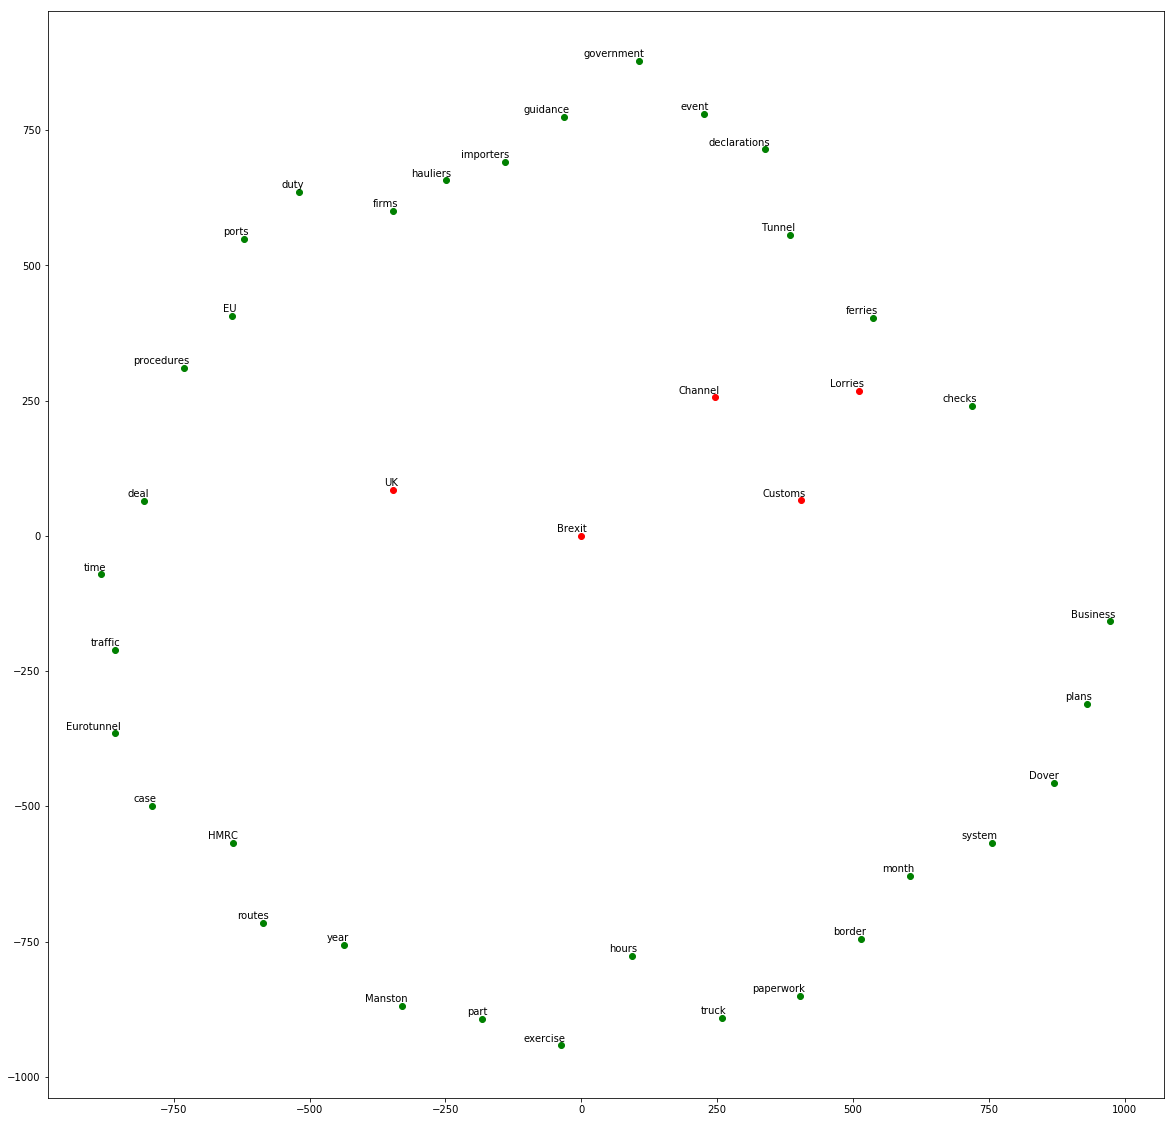

In [4]:
peripheralProcessor = LC.Peripheral(text)
peripheralProcessor.setAllowedPosTypes(['NN', 'NNP', 'NNS', 'NNPS'])
peripheralProcessor.setPositionContributingFactor(1)
peripheralProcessor.setOccuranceContributingFactor(1)
peripheralProcessor.setProperNounContributingFactor(1)
peripheralProcessor.setTopScorePercentage(0.5)
peripheralProcessor.setFilterWords(0.1)
print(peripheralProcessor.getProperNouns())
peripheralProcessor.train()
peripheralProcessor.displayPlot()

Total vocab:  104
Filtered vocab:  39


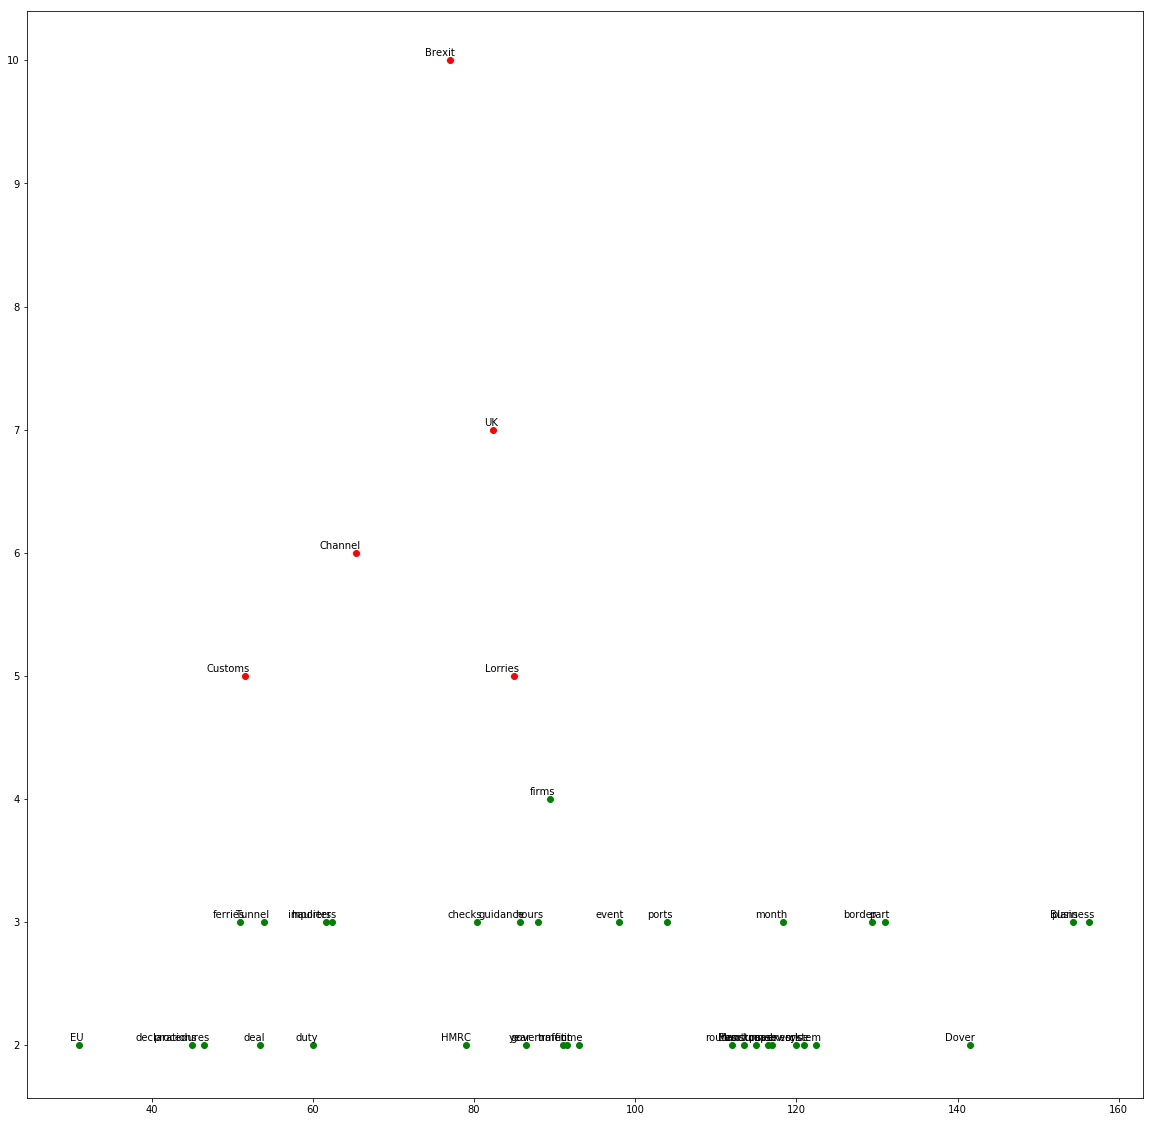

In [5]:
linearProcessor = LC.Linear(text)
linearProcessor.setAllowedPosTypes(['NN', 'NNP', 'NNS', 'NNPS'])
linearProcessor.setPositionContributingFactor(1)
linearProcessor.setOccuranceContributingFactor(1)
linearProcessor.setProperNounContributingFactor(1)
linearProcessor.setTopScorePercentage(0.5)
linearProcessor.setFilterWords(0.1)
linearProcessor.displayPlot()

In [6]:
print(linearProcessor.getProperNouns())

['Channel Tunnel', 'Brexit', 'New', 'Channel', 'EU', 'UK', 'GMT', 'Friday', 'March', 'Theresa May', 'Eurotunnel Brexit', 'HM Revenue Customs HMRC', 'Europe Tunnel', 'Media', 'Manston Tunnel', 'HMRC', 'EUbound', 'Calais Coquelles', 'Dunkirk', 'Charlie Elphicke', 'Conservative MP', 'Dover', 'Rod McKenzie', 'Road Haulage Association', 'Business', 'BBC', 'Manston Airport', 'Ramsgate', 'Kent', 'Port', 'Tuesday', 'Eurotunnel']


In [7]:
print(linearProcessor.getContrinutors())

['brexit', 'custom', 'lorri', 'channel', 'uk']
